# Load Packages 

In [1]:
Threads.nthreads()

6

In [2]:
using Plots
using Clustering
using ParallelKMeans
using Random
using BenchmarkTools
using DelimitedFiles

In [3]:
# Read same data as constructed by Sklearn
X = DelimitedFiles.readdlm("data.csv", ',', Float64);

In [4]:
size(X)

(1000000, 30)

In [5]:
# Read same data as transposed matrix since Julia is column major
X = permutedims(X);

In [6]:
size(X)

(30, 1000000)

## Benchmark Clustering

In [7]:
@benchmark [Clustering.kmeans(X, i, tol=1e-4, maxiter=300).totalcost for i = 2:10] samples=7 seconds=600

BenchmarkTools.Trial: 
  memory estimate:  17.28 GiB
  allocs estimate:  15970
  --------------
  minimum time:     265.419 s (0.65% GC)
  median time:      267.039 s (0.61% GC)
  mean time:        268.028 s (0.62% GC)
  maximum time:     271.626 s (0.59% GC)
  --------------
  samples:          3
  evals/sample:     1

In [8]:
a = [Clustering.kmeans(X, i, tol=1e-4, maxiter=300).totalcost for i = 2:10]

9-element Array{Float64,1}:
 2.4375150976197375e6
 2.3996567653025836e6
 2.369175865593604e6 
 2.3465851851901766e6
 2.327114506399012e6 
 2.3097788921812596e6
 2.293754461310548e6 
 2.2809080524053834e6
 2.2682393997047623e6

## Benchmark ParallelKMeans Single-Thread

In [9]:
@benchmark [ParallelKMeans.kmeans(Lloyd(), X, i, n_threads=1,
            tol=1e-6, max_iters=300, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=600

BenchmarkTools.Trial: 
  memory estimate:  206.17 MiB
  allocs estimate:  7127
  --------------
  minimum time:     164.173 s (0.01% GC)
  median time:      175.151 s (0.00% GC)
  mean time:        178.574 s (0.01% GC)
  maximum time:     199.820 s (0.01% GC)
  --------------
  samples:          4
  evals/sample:     1

In [19]:
b = [ParallelKMeans.kmeans(Lloyd(), X, i, n_threads=1,
     tol=1e-6, max_iters=300, verbose=false).totalcost 
     for i = 2:10]

9-element Array{Float64,1}:
 2.43754668667654e6  
 2.399512725655643e6 
 2.3691422003800212e6
 2.3464100075261747e6
 2.3270634688153425e6
 2.3099719745506747e6
 2.2936152522628186e6
 2.280794413622403e6 
 2.2683938704528557e6

In [11]:
@benchmark [ParallelKMeans.kmeans(LightElkan(), X, i, n_threads=1,
            tol=1e-6, max_iters=300, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=600

BenchmarkTools.Trial: 
  memory estimate:  206.19 MiB
  allocs estimate:  8095
  --------------
  minimum time:     196.070 s (0.00% GC)
  median time:      211.611 s (0.00% GC)
  mean time:        209.993 s (0.01% GC)
  maximum time:     222.297 s (0.01% GC)
  --------------
  samples:          3
  evals/sample:     1

In [18]:
c = [ParallelKMeans.kmeans(LightElkan(), X, i, n_threads=1,
     tol=1e-6, max_iters=300, verbose=false).totalcost 
     for i = 2:10]

9-element Array{Float64,1}:
 2.4375982414629483e6
 2.3994529243001686e6
 2.3697336569120446e6
 2.346693855856612e6 
 2.327138221961555e6 
 2.309825382245898e6 
 2.294535466271718e6 
 2.280734354221458e6 
 2.268363142664136e6 

## Benchmark ParallelKMeans Multi-Thread

In [13]:
@benchmark [ParallelKMeans.kmeans(LightElkan(), X, i, n_threads=6,
            tol=1e-6, max_iters=300, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=600

BenchmarkTools.Trial: 
  memory estimate:  210.33 MiB
  allocs estimate:  63358
  --------------
  minimum time:     30.450 s (0.07% GC)
  median time:      36.847 s (0.03% GC)
  mean time:        35.943 s (0.03% GC)
  maximum time:     39.606 s (0.03% GC)
  --------------
  samples:          7
  evals/sample:     1

In [22]:
d = [ParallelKMeans.kmeans(LightElkan(), X, i, n_threads=6,
     tol=1e-6, max_iters=300, verbose=false).totalcost 
     for i = 2:10]

9-element Array{Float64,1}:
 2.4374256849843226e6
 2.3993127369422996e6
 2.3691059414107744e6
 2.3466217360044373e6
 2.326815176595604e6 
 2.310039745781919e6 
 2.293777390843363e6 
 2.280854726802474e6 
 2.2683494919647016e6

In [15]:
@benchmark [ParallelKMeans.kmeans(Lloyd(), X, i, n_threads=6,
            tol=1e-6, max_iters=300, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=600

BenchmarkTools.Trial: 
  memory estimate:  210.09 MiB
  allocs estimate:  59040
  --------------
  minimum time:     28.396 s (0.07% GC)
  median time:      33.659 s (0.03% GC)
  mean time:        34.573 s (0.03% GC)
  maximum time:     41.955 s (0.02% GC)
  --------------
  samples:          7
  evals/sample:     1

In [20]:
e = [ParallelKMeans.kmeans(Lloyd(), X, i, n_threads=6,
     tol=1e-6, max_iters=300, verbose=false).totalcost 
     for i = 2:10]

9-element Array{Float64,1}:
 2.437342446668551e6 
 2.399539818435716e6 
 2.3695927917522164e6
 2.346623025607512e6 
 2.3273237277871748e6
 2.309897978014919e6 
 2.293721192062558e6 
 2.280718515474486e6 
 2.26832430592486e6  

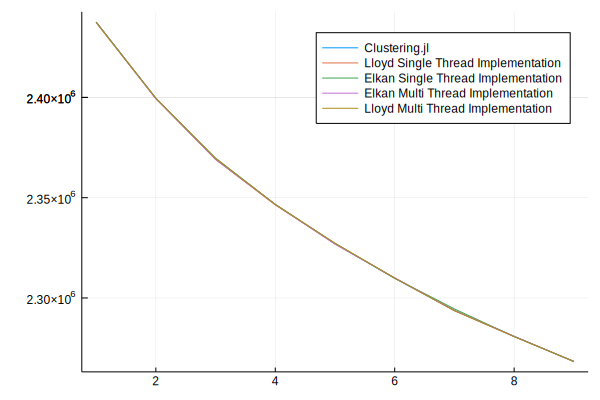

In [23]:
plot(a, label="Clustering.jl")
plot!(b, label="Lloyd Single Thread Implementation")
plot!(c, label="Elkan Single Thread Implementation")
plot!(d, label="Elkan Multi Thread Implementation")
plot!(e, label="Lloyd Multi Thread Implementation")